In [2]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

# Summary statistic

In [3]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])

In [4]:
dframe1 = DataFrame(arr,index=['A','B'],columns=['One','Two','Three'])

dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [5]:
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [6]:
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [7]:
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [8]:
dframe1.idxmax()

One      A
Two      B
Three    B
dtype: object

In [11]:
# accumulate sum along the column
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [12]:
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [18]:
import pandas_datareader.data as pdweb
import datetime

/home/vinhngo/miniconda3/envs/sp/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [20]:
prices = pdweb.get_data_yahoo(['CVX','XOM','BP'],start=datetime.datetime(2010,1,1),
                             end=datetime.datetime(2013,1,1))['Adj Close']
prices.head()

Symbols,CVX,XOM,BP
Date,,,
2009-12-31,52.416977,48.657547,33.898167
2010-01-04,53.826290,49.342556,34.588184
2010-01-05,54.207569,49.535217,34.833763
2010-01-06,54.214378,49.963345,35.015053
2010-01-07,54.010117,49.806370,35.003349


In [22]:
volume = pdweb.get_data_yahoo(['CVX','XOM','BP'],start=datetime.datetime(2010,1,1),
                             end=datetime.datetime(2013,1,1))['Volume']

In [23]:
volume.head()

Symbols,CVX,XOM,BP
Date,,,
2009-12-31,4246600.0,18852300.0,1517600.0
2010-01-04,10173800.0,27809100.0,3956100.0
2010-01-05,10593700.0,30174700.0,4109600.0
2010-01-06,11014600.0,35044700.0,6227900.0
2010-01-07,9626900.0,27192100.0,4431300.0


In [33]:
rets = prices.pct_change()
rets.head()

Symbols,CVX,XOM,BP
Date,,,
2009-12-31,NaN,NaN,NaN
2010-01-04,1.395752,0.475104,1.606813
2010-01-05,0.041273,0.085066,0.038801
2010-01-06,0.039731,0.161393,0.515452
2010-01-07,-0.125987,-0.224074,-0.288476


In [39]:
# Corr of the stock
corr = rets.corr

In [ ]:
prices.plot()

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

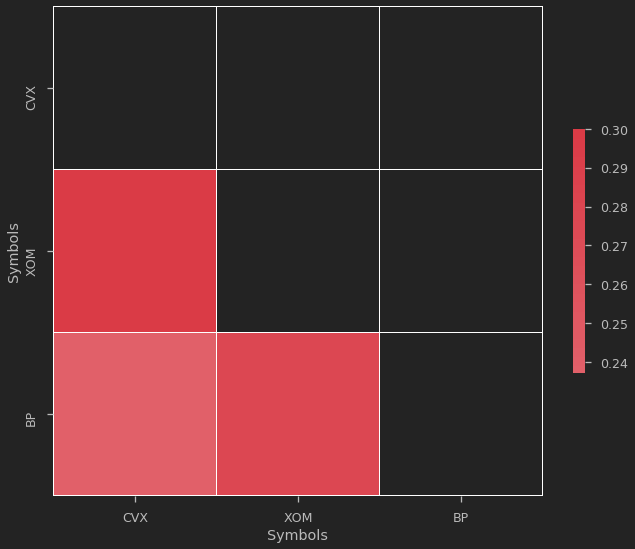

In [40]:
# sns.corrplot(rets,annot=False,diag_names=False)
mask = np.triu(np.ones_like(rets.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(rets.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [42]:
ser1 = Series(['w','w','w','x','y','z','w','x','y','z','a'])

ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [43]:
ser1.value_counts()

w    4
x    2
z    2
y    2
a    1
dtype: int64

# Missing data

In [44]:
data = Series(['one','two',np.nan,'four'])

In [45]:
data

0     one
1     two
2     NaN
3    four
dtype: object

In [47]:
data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [48]:
data.dropna()

0     one
1     two
3    four
dtype: object

In [49]:
dframe = DataFrame([[1,2,3],[np.nan,5,6],[7,np.nan,9],[np.nan,np.nan,np.nan]])

dframe

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


In [50]:
clean_dframe = dframe.dropna()
clean_dframe

,0,1,2
0,1.0,2.0,3.0


In [51]:
dframe.dropna(how='all')

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0


In [52]:
dframe.dropna(axis=1)

""
0
1
2
3


In [53]:
na = np.nan
dframe2 = DataFrame([[1,2,3,na],[2,na,5,6],[na,7,na,9],[1,na,na,na]])

In [54]:
dframe2

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


In [55]:
dframe2.dropna(thresh=2)

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0


In [56]:
dframe2.fillna(1)

,0,1,2,3
0,1.0,2.0,3.0,1.0
1,2.0,1.0,5.0,6.0
2,1.0,7.0,1.0,9.0
3,1.0,1.0,1.0,1.0


In [58]:
dframe2.fillna({0:0,1:1,2:2,3:3})

,0,1,2,3
0,1.0,2.0,3.0,3.0
1,2.0,1.0,5.0,6.0
2,0.0,7.0,2.0,9.0
3,1.0,1.0,2.0,3.0


In [60]:
dframe2.fillna(1,inplace=True)

In [61]:
dframe2

,0,1,2,3
0,1.0,2.0,3.0,1.0
1,2.0,1.0,5.0,6.0
2,1.0,7.0,1.0,9.0
3,1.0,1.0,1.0,1.0


# Index hierachy

In [63]:
ser = Series(np.random.randn(6),index=[[1,1,1,2,2,2],['a','b','c','a','b','c']])

In [64]:
ser

1  a    0.665350
   b   -1.165654
   c   -0.861529
2  a    0.489374
   b    0.452700
   c    0.196478
dtype: float64

In [65]:
ser.index

MultiIndex([(1, 'a'),
            (1, 'b'),
            (1, 'c'),
            (2, 'a'),
            (2, 'b'),
            (2, 'c')],
           )

In [66]:
ser[1]

a    0.665350
b   -1.165654
c   -0.861529
dtype: float64

In [67]:
ser[:,'a']

1    0.665350
2    0.489374
dtype: float64

In [68]:
dframe = ser.unstack()

In [69]:
dframe

,a,b,c
1,0.665350,-1.165654,-0.861529
2,0.489374,0.452700,0.196478


In [72]:
dframe2 = DataFrame(np.arange(16).reshape(4,4),index=[['a','a','b','b'],[1,2,1,2]],
                   columns=[['NY','NY','LA','SF'],['cold','hot','cold','hot']])
dframe2

NY       LA  SF
    cold hot cold hot
a 1    0   1    2   3
  2    4   5    6   7
b 1    8   9   10  11
  2   12  13   14  15

In [94]:
dframe2.index.names = ['INDEX_1','INDEX_2']
dframe2.columns.names = ['Cities','Temp']

In [75]:
dframe2

Cities            NY       LA  SF
Temp            cold hot cold hot
INDEX_1 INDEX_2                  
a       1          0   1    2   3
        2          4   5    6   7
b       1          8   9   10  11
        2         12  13   14  15

In [97]:
dframe2.swaplevel('Cities','Temp',axis=1)
dframe2.swaplevel(axis=0)

Cities            NY       LA  SF
Temp            cold hot cold hot
INDEX_2 INDEX_1                  
1       a          0   1    2   3
2       a          4   5    6   7
1       b          8   9   10  11
2       b         12  13   14  15

In [98]:
dframe2.sort_index(1)

Cities            LA   NY      SF
Temp            cold cold hot hot
INDEX_1 INDEX_2                  
a       1          2    0   1   3
        2          6    4   5   7
b       1         10    8   9  11
        2         14   12  13  15

In [96]:
dframe2.sort_index(0)

Cities            NY       LA  SF
Temp            cold hot cold hot
INDEX_1 INDEX_2                  
a       1          0   1    2   3
        2          4   5    6   7
b       1          8   9   10  11
        2         12  13   14  15

In [99]:
dframe2.sum(level='Temp',axis=1)

Temp             cold  hot
INDEX_1 INDEX_2           
a       1           2    4
        2          10   12
b       1          18   20
        2          26   28